# My Job Applications 2023

### Imports

In [90]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mpld

### Empty Data Frame

In [91]:
df_columns = {'url': 'str', 'date_applied': 'datetime64[ns]', 'job_title': 'str', 
              'department': 'str', 'company': 'str', 'location': 'str', 'recruiter': 'str', 
              'date_init_resp': 'datetime64[ns]', 'initial_response': 'str', 
              'date_interview1': 'datetime64[ns]', 'interview_comments': 'str', 
              'more_interviews': 'str', 'final_outcome': 'int8'}

jobs_df = pd.DataFrame({c: pd.Series(dtype=t) for c, t in df_columns.items()})
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   url                 0 non-null      object        
 1   date_applied        0 non-null      datetime64[ns]
 2   job_title           0 non-null      object        
 3   department          0 non-null      object        
 4   company             0 non-null      object        
 5   location            0 non-null      object        
 6   recruiter           0 non-null      object        
 7   date_init_resp      0 non-null      datetime64[ns]
 8   initial_response    0 non-null      object        
 9   date_interview1     0 non-null      datetime64[ns]
 10  interview_comments  0 non-null      object        
 11  more_interviews     0 non-null      object        
 12  final_outcome       0 non-null      int8          
dtypes: datetime64[ns](3), int8(1), object(9)
memory usage: 0.0+ bytes


### Insert Data

In [92]:
jobs_df.loc[0, 'url':'location'] = 'https://jobs.lever.co/spotify/f6399d24-74ff-\
406c-be20-ffdac88de4d0?lever-source=LinkedInJobs', \
                                   '2023-01-04', 'Machine Learning Engineer', \
                                   'Content Intelligence', 'Spotify', 'Berlin/Remote'
jobs_df.loc[0, 'initial_response'] = '0'

In [93]:
jobs_df.loc[1, 'url':'location'] = 'https://join.com/companies/convex-energy/671\
1604-integrations-developer-c-python-m-f-d?pid=731067c1dfecf6015bf5&oid=040cad5b-\
9c17-4c36-8fc4-e1390e7d46ed', \
                                    '2023-01-04', 'Integrations Developer - C#/Python', \
                                    'IT Management', 'Convex Energy', 'Berlin'
jobs_df.loc[1, 'initial_response'] = '0'                                    

In [94]:
jobs_df.loc[2, 'url':'location'] = 'https://bikemap.jobs.personio.com/job/415336?display=de', \
                                   '2023-01-04', 'Backend Developer - Python', \
                                   None, 'Bikemap', 'Vienna'
jobs_df.loc[2, 'initial_response'] = '0'                                   

In [95]:
jobs_df.loc[3, 'url':'location'] = 'https://karriere.deutschebahn.com/karriere-de/Suche/DevOps-Engineer-w-m-d-mit-Fokus\
-auf-Data-Science-9981626?jobId=194391', \
                                   '2023-01-04', 'DevOps Engineer mit Fokus auf Data Science', \
                                   'DB Systel', 'DB', 'Berlin'
jobs_df.loc[3, 'date_init_resp':'initial_response'] = '1.9.23', 'Rejected'

In [96]:
jobs_df.loc[4, 'url':'location'] = 'https://mbition.io/jobs/?job=911357&apply=1&\
pid=e78ca23c-a06c-4c87-a70c-fcc7052e7ffa&it=Mz7a17-DxBfrsvGYFVyA5A', \
                                   '2023-01-04', 'Site Reliability Engineer for Hybrid Cloud Platform', \
                                   'MBition', 'Mercedes-Benz', 'Berlin'
jobs_df.loc[4, 'initial_response'] = '0'                                   

In [97]:
jobs_df.loc[5, 'url':'location'] = 'https://www.accenture.com/us-en/careers/job\
details?id=R00005249_de&title=Trainee+Data+(AI+%2f+Big+Data+Analytics+%2f+Data+Management)+(all+genders)', \
                                   '2023-01-04', 'Trainee Data - AI/Big Data Analytics/Data Management', \
                                   None, 'Accenture', 'Germany'
jobs_df.loc[5, 'initial_response'] = '0'                                   

In [98]:
jobs_df.loc[6, 'url':'location'] = 'https://apply.workable.com/focusrite/j/7291245450/', \
                                   '2023-01-07', 'Junior QA Engineer', \
                                   'Audio Hardware & Firmware Testing', \
                                   'ADAM Audio (Focusrite)', 'Berlin'
jobs_df.loc[6, 'initial_response'] = '0'

In [99]:
jobs_df.loc[7, 'url':'location'] = 'http://jobs.daedalicsupport.com/index/build-engineer-(m/f/d).html', \
                                   '2023-01-07', 'Build Engineer', \
                                   None, 'Daedalic Entertianment', 'Hamburg'
jobs_df.loc[7, 'initial_response'] = '0'                                   

In [100]:
jobs_df.loc[8, 'url':'location'] = 'https://careers.soundcloud.com/job?gh_jid=6561571002&gh_src=b2264ac52us', \
                                   '2023-01-10', 'Machine Learning Engineer', \
                                   'Search and Recommendations', 'SoundCloud', 'Berlin'
jobs_df.loc[8, 'initial_response'] = '0'                                                                      

In [101]:
jobs_df

,url,date_applied,job_title,department,company,location,recruiter,date_init_resp,initial_response,date_interview1,interview_comments,more_interviews,final_outcome
0,https://jobs.lever.co/spotify/f6399d24-74ff-40...,2023-01-04,Machine Learning Engineer,Content Intelligence,Spotify,Berlin/Remote,NaN,NaT,0,NaT,NaN,NaN,NaN
1,https://join.com/companies/convex-energy/67116...,2023-01-04,Integrations Developer - C#/Python,IT Management,Convex Energy,Berlin,NaN,NaT,0,NaT,NaN,NaN,NaN
2,https://bikemap.jobs.personio.com/job/415336?d...,2023-01-04,Backend Developer - Python,None,Bikemap,Vienna,NaN,NaT,0,NaT,NaN,NaN,NaN
3,https://karriere.deutschebahn.com/karriere-de/...,2023-01-04,DevOps Engineer mit Fokus auf Data Science,DB Systel,DB,Berlin,NaN,2023-01-09,Rejected,NaT,NaN,NaN,NaN
4,https://mbition.io/jobs/?job=911357&apply=1&pi...,2023-01-04,Site Reliability Engineer for Hybrid Cloud Pla...,MBition,Mercedes-Benz,Berlin,NaN,NaT,0,NaT,NaN,NaN,NaN
5,https://www.accenture.com/us-en/careers/jobdet...,2023-01-04,Trainee Data - AI/Big Data Analytics/Data Mana...,None,Accenture,Germany,NaN,NaT,0,NaT,NaN,NaN,NaN
6,https://apply.workable.com/focusrite/j/7291245...,2023-01-07,Junior QA Engineer,Audio Hardware & Firmware Testing,ADAM Audio (Focusrite),Berlin,NaN,NaT,0,NaT,NaN,NaN,NaN
7,http://jobs.daedalicsupport.com/index/build-en...,2023-01-07,Build Engineer,None,Daedalic Entertianment,Hamburg,NaN,NaT,0,NaT,NaN,NaN,NaN
8,https://careers.soundcloud.com/job?gh_jid=6561...,2023-01-10,Machine Learning Engineer,Search and Recommendations,SoundCloud,Berlin,NaN,NaT,0,NaT,NaN,NaN,NaN


## Graphs

[Text(0, 0, 'Jan 4'), Text(1, 0, 'Jan 7'), Text(2, 0, 'Jan 10')]

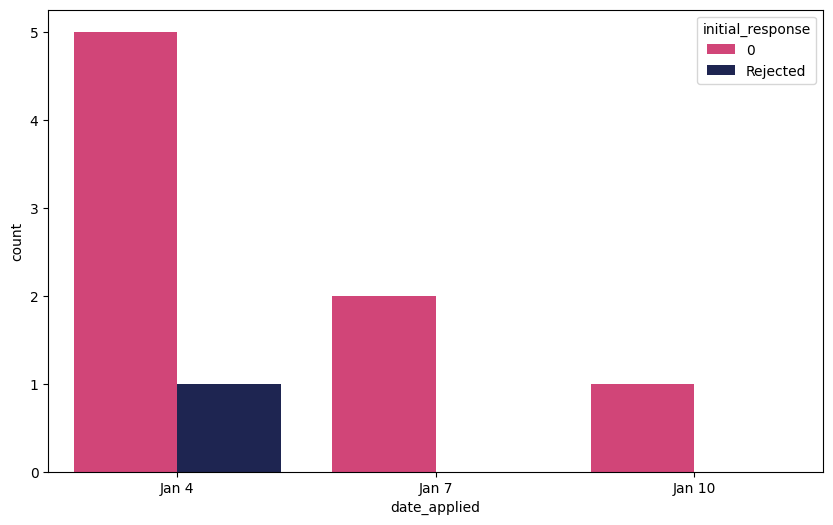

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
my_reject_palette = ['#e82e72', '#161f59', '#bdff99']
fig = sns.countplot(x=jobs_df.date_applied, hue=jobs_df.initial_response, palette=my_reject_palette)
my_dates = np.unique(np.array([x.strftime('%Y-%m-%d') for x in jobs_df.date_applied], dtype='datetime64'))
ax.set_xticklabels([pd.to_datetime(tm).strftime('%b %-d') for tm in my_dates])